## Introduction

This dataset contains information on what we will look to put forward in our upcoming trades, with the aim to provide more visibility ahead of the actual trade opportunities.

For general Constraint Management Zone (CMZ) information and overall requirements, please go to the [Flexibility – Requirements](https://connecteddata.nationalgrid.co.uk/dataset/flexibility-requirements) page.

National Grid facilitates its flexibility procurement activity through its online portal, [Market Gateway](https://marketgateway.nationalgrid.co.uk/). Flexibility Service Providers (FSPs) seeking an award to deliver flexibility services should register on the Market Gateway and complete the pre-qualification requirements to enable their eligibility to enter into flexibility Trades.


**Data**
Currently, this dataset only covers Long Term and Sustain trade opportunities in detail.

<code>Long_Term_Trade_Parameters.csv</code> includes information for Secure and/or Dynamic flexibility products within HV Zones, such as peak MW requirements (min, max), ceiling prices, and delivery windows (dates, times, days required).

As Sustain is the same product across both HV and LV zones, Sustain_Trade_Parameters.csv contains information for all zones where Sustain is available. This information includes the capacity we need (minimum and maximum kW), the maximum price we can pay (ceiling price £/kW/season), and service delivery windows (dates, times, days required).


**Disclaimer**
While every effort has been made to ensure its accuracy, the data may contain inaccuracies, omissions, or may be out of date. Users are advised to independently verify any information before relying on it for decision-making or analysis. The creators of this dataset do not assume any liability for errors, inaccuracies, or omissions, nor for any actions taken based on the information contained herein.

## Definition of Terms

Definitions of features used in energy flexibility services and trading in this data:

| Term                                             | Definition                                                                                     |
|--------------------------------------------------|------------------------------------------------------------------------------------------------|
| CMZ Code                                        | Constraint Management Zone code, identifying a specific area where flexibility services are needed. |
| Flexibility Product                              | The type of flexibility service offered (e.g., Dynamic, Secure, Sustain).                     |
| Trade Opportunity Name                           | A unique identifier for a specific trading opportunity.                                       |
| Trade Window Name                                | The name of a specific time window within a trade opportunity.                                |
| Delivery Start Date                              | The date when the flexibility service delivery begins.                                        |
| Delivery End Date                                | The date when the flexibility service delivery ends.                                          |
| Service Days                                     | Days of the week when the service is required.                                               |
| Delivery Start Time                              | The time when the flexibility service delivery begins each day.                               |
| Delivery End Time                                | The time when the flexibility service delivery ends each day.                                 |
| Tendered Capacity [kW]                          | The maximum capacity offered by the system operator for this service.                         |
| Tendered Ceiling Availability Price               | The maximum price the system operator will pay for availability.                              |
| Tendered Ceiling Utilisation Price               | The maximum price the system operator will pay for utilization.                               |
| Tendered Sustain Ceiling Price                   | The maximum price for sustained flexibility services.                                         |
| Trade Open Date                                  | The date when bidding for the trade opportunity opens.                                        |
| Trade Close Date                                 | The deadline for submitting bids.                                                              |
| Company Name                                     | The name of the flexibility service provider.                                                 |
| Offered Capacity [kW]                           | The capacity offered by the provider.                                                          |
| Offered Availability Price                        | The price at which the provider offers to make their capacity available.                      |
| Offered Utilisation Price                        | The price at which the provider offers to utilize their capacity.                             |
| Offered Sustain Price                            | The price offered for sustained flexibility services.                                          |
| Trade Outcome                                    | The result of the trade (e.g., Accepted, Rejected).                                          |
| Accepted Capacity [kW]                          | The capacity accepted by the system operator.                                                 |
| Awarded Availability Price                        | The final agreed price for availability.                                                      |
| Awarded Utilisation Price                        | The final agreed price for utilization.                                                       |
| Awarded Sustain Price                            | The final agreed price for sustained services.                                                |
| Technology Type                                  | The type of technology used to provide flexibility (e.g., Battery, EV charging).              |
| Number of Assets                                 | The number of individual assets comprising the offered capacity.                               |
| Total Asset Installed Capacity                    | The total installed capacity of all assets.                                                  |
| Available for Restore                            | Indicates if the assets can provide restoration services.                                     |
| Restore Price                                    | The price for providing restoration services.                                                 |

<br></br>

## Analyses and Visualisations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [1]:
import pandas

In [3]:
data = pd.read_csv('datastore/trade_results.csv')
data.head()

,CMZ Code,Flexibility Product,Trade Opportunity Name,Trade Window Name,Delivery Start Date,Delivery End Date,Service Days,Delivery Start Time,Delivery End Time,Tendered Capacity [kW],...,Trade Outcome,Accepted Capacity [kW],Awarded Availability Price,Awarded Utilisation Price,Awarded Sustain Price,Technology Type,Number of Assets,Total Asset Installed Capacity,Available for Restore,Restore Price
0,CMZ_LV_T7A_EM_870594,Sustain,Winter 2024/25 - Sustain - 870594 Seaburn Road...,"""2024/2025""",2024-11-04,2025-02-28,"Monday,Tuesday,Wednesday,Thursday,Friday",16:00:00,20:00:00,135.0,...,Accepted,1.9498,0.0,0.0,22.48,EV charge point,1,1.7500,No,1200
1,CMZ_LV_T7A_EM_870594,Sustain,Winter 2024/25 - Sustain - 870594 Seaburn Road...,"""2024/2025""",2024-11-04,2025-02-28,"Monday,Tuesday,Wednesday,Thursday,Friday",16:00:00,20:00:00,135.0,...,Accepted,1.9498,0.0,0.0,22.48,Household demand,1,0.1998,No,1200
2,CMZ_LV_T7A_EM_870782,Sustain,Winter 2024/25 - Sustain - 870782 Kidsley Park...,"""2024/2025""",2024-11-04,2025-02-28,"Monday,Tuesday,Wednesday,Thursday,Friday",16:00:00,20:00:00,12.0,...,Accepted,1.3700,0.0,0.0,112.69,EV charge point,1,1.3700,No,1200
3,CMZ_LV_T7A_EM_870809,Sustain,Dec 2023 - Feb 2024 - Sustain - 870809 East Ne...,"""Dec 2023 - Feb 2024 """,2023-12-04,2024-03-01,"Monday,Tuesday,Wednesday,Thursday,Friday",16:00:00,20:00:00,66.0,...,Accepted,1.3700,0.0,0.0,34.32,EV charge point,1,1.3700,No,1200
4,CMZ_LV_T7A_EM_870809,Sustain,Winter 2024/25 - Sustain - 870809 East Nelson ...,"""2024/2025""",2024-11-04,2025-02-28,"Monday,Tuesday,Wednesday,Thursday,Friday",16:00:00,20:00:00,82.5,...,Accepted,1.3700,0.0,0.0,36.79,EV charge point,1,1.3700,No,1200


In [263]:
data.shape

(15136, 30)

In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15136 entries, 0 to 15135
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CMZ Code                             15136 non-null  object 
 1   Flexibility Product                  15136 non-null  object 
 2   Trade Opportunity Name               15136 non-null  object 
 3   Trade Window Name                    15136 non-null  object 
 4   Delivery Start Date                  15136 non-null  object 
 5   Delivery End Date                    15136 non-null  object 
 6   Service Days                         15136 non-null  object 
 7   Delivery Start Time                  15136 non-null  object 
 8   Delivery End Time                    15136 non-null  object 
 9   Tendered Capacity [kW]               15136 non-null  float64
 10  Tendered Ceiling Availability Price  15136 non-null  float64
 11  Tendered Ceiling Utilisation

Convert dates and times to proper format

In [4]:
# Convert all relevant date and time columns to pandas datetime format
data['Delivery End Date'] = pd.to_datetime(data['Delivery End Date'])
data['Delivery Start Time'] = pd.to_datetime(data['Delivery Start Time'], format='%H:%M:%S').dt.time
data['Delivery End Time'] = pd.to_datetime(data['Delivery End Time'], format='%H:%M:%S').dt.time
data['Delivery Start Date'] = pd.to_datetime(data['Delivery Start Date'])

### Feature Engineering

In [24]:
#  get the total number of service days per CMZ Code
data['Service Days Count'] = data['Service Days'].str.split(',').apply(len).astype(int)

# get convert the service days to columns as binary-encoded days
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for day in days_of_week:
    data[day] = data['Service Days'].apply(lambda x: 1 if day in x.split(',') else 0)


# Total delivery period
data['Delivery Period'] = (data['Delivery End Date'] - data['Delivery Start Date']).dt.days

data.sample(6)

,CMZ Code,Flexibility Product,Trade Opportunity Name,Trade Window Name,Delivery Start Date,Delivery End Date,Service Days,Delivery Start Time,Delivery End Time,Tendered Capacity [kW],...,Restore Price,Service Days Count,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Delivery Period
4863,CMZ_T6B_SWE_0025,Dynamic,T8A - Winter 2024/25 - Dynamic - Morwenstow,"""November 2024""",2024-11-01,2024-11-30,"Monday,Tuesday,Wednesday,Thursday,Friday,Satur...",13:00:00,13:30:00,200.0,...,1200,7,1,1,1,1,1,1,1,29
4764,CMZ_T6B_SWE_0025,Dynamic,T8A - Winter 2024/25 - Dynamic - Morwenstow,"""October 2024""",2024-10-01,2024-10-31,"Monday,Tuesday,Wednesday,Thursday,Friday,Satur...",13:30:00,14:00:00,700.0,...,1200,7,1,1,1,1,1,1,1,30
39,CMZ_LV_T7A_EM_873443,Sustain,"Winter 2024/25 - Sustain - 873443 Doris Road,I...","""2024/2025""",2024-11-04,2025-02-28,"Monday,Tuesday,Wednesday,Thursday,Friday",16:00:00,20:00:00,222.0,...,1200,5,1,1,1,1,1,0,0,116
8961,CMZ_T8A_SWE_0037,Secure,T8A - Winter 2027/28 - Secure - Tiverton to Br...,"""March 2028""",2028-03-01,2028-03-31,"Tuesday,Wednesday",18:30:00,19:00:00,30.0,...,1200,2,0,1,1,0,0,0,0,30
1969,CMZ_T4A_SWA_0001,Dynamic,Winter 2023/24 - Dynamic - Llandrindod - Rhayader,"""March 2024""",2024-03-01,2024-03-24,"Monday,Tuesday,Wednesday,Thursday,Friday,Satur...",18:30:00,19:00:00,400.0,...,1200,7,1,1,1,1,1,1,1,23
2188,CMZ_T4A_SWA_0001,Dynamic,T8A - Summer 2024 - Dynamic - Llandrindod - Rh...,"""August 2024""",2024-08-01,2024-08-31,Friday,10:00:00,10:30:00,50.0,...,1200,1,0,0,0,0,1,0,0,30


Looking at Trade Outcome for each FSP.

In [267]:
company_outcomes = data.groupby('Company Name')['Trade Outcome'].value_counts().unstack(fill_value=0)
print(company_outcomes)

# sort companies by total number of trades
company_outcomes = company_outcomes.sort_values(by=company_outcomes.columns.tolist(), ascending=False)

# assign colors
color_map = {
    'Accepted': 'green',
    'Rejected': 'red',
    'No response received': 'gray'
}

# create traces for each Trade Outcome
traces = []
for outcome in company_outcomes.columns:
    traces.append(go.Bar(
        name=outcome,
        y=company_outcomes.index,
        x=company_outcomes[outcome],
        orientation='h',
        marker_color=color_map.get(outcome, 'blue')  # blue if outcome not in color_map
    ))

# create the figure
fig = go.Figure(data=traces)

# Update layout
fig.update_layout(
    title='Trade Outcomes by Company',
    barmode='stack',
    height=800,
    width=1000,
    yaxis={'categoryorder':'total ascending'},
    xaxis_title='Number of Trades',
    yaxis_title='Company Name',
    legend_title='Trade Outcome',
    hovermode='closest'
)

fig.show()

Trade Outcome                Accepted  No response received  Rejected
Company Name                                                         
0                                   0                  4560         0
Axle Energy Limited              2394                     0        52
Conrad Energy Limited               5                     0         5
EV DOT ENERGY LTD                 393                     0         1
East Langford Solar Limited        98                     0       178
Electric Miles Ltd                 95                     0         8
Equiwatt Ltd.                      30                     0         0
Levelise Limited                  812                     0         0
OVO Energy Ltd                    172                     0         0
Octopus Energy Limited           5410                     0       917
ZENOBE RENTAL 6 LIMITED             6                     0         0


> Analysis

**Market Dominance**:
 - Octopus Energy Limited is clearly the market leader, with 5,410 accepted trades, significantly more than any other company.
 - Axle Energy Limited is the second most active, with 2,394 accepted trades.

**Success Rates**:
 - Levelise Limited, OVO Energy Ltd, Equiwatt Ltd., and ZENOBE RENTAL 6 LIMITED have 100% acceptance rates, with all their trades being accepted.
 - Octopus Energy Limited, despite having the highest number of accepted trades, also has a significant number of rejections (917), indicating a more aggressive bidding strategy.

**Rejection Patterns**:
 - East Langford Solar Limited has a high rejection rate compared to its acceptances (178 rejections vs 98 acceptances), suggesting they might be pricing their offers too high or have other constraints affecting their bids.
 - Conrad Energy Limited has an equal number of acceptances and rejections, indicating potential room for improvement in their bidding strategy.

**Market Participation**:
 - Some companies like Electric Miles Ltd, Equiwatt Ltd., and ZENOBE RENTAL 6 LIMITED have relatively low participation numbers, suggesting they might be new entrants or have limited capacity.

Anomaly:
 - As expected, there's an entry with 4,560 "No response received" outcomes, but no company name associated.

**Market Concentration**:
 - The top two companies (Octopus Energy Limited and Axle Energy Limited) account for about 78% of all accepted trades, indicating a highly concentrated market.

<br></br>

### Looking at Technologies offered by each FSP, what Utilisation Price, and at what Capacity

In [268]:

# Group the data and calculate averages
grouped_data = data.groupby(['Company Name', 'Technology Type']).agg({
    'Offered Capacity [kW]': 'mean',
    'Offered Utilisation Price': 'mean'
}).reset_index()

# Create subplots: one for Capacity, one for Price
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1,
                    subplot_titles=('Average Offered Capacity [KW] by Company and Technology',
                                    'Average Offered Utilisation Price by Company (£) and Technology'))

# Color mapping for technology types
tech_colors = {
    'EV charge point': 'blue',
    'Battery, compressed air system': 'green',
    'Air source heat pump': 'red',
    'Household demand': 'purple',
    'Engine (combustion / reciprocating)': 'orange',
    'Hybrid heat pump': 'cyan',
    'Photovoltaic': 'yellow'
}

# Add traces for Capacity
for tech in grouped_data['Technology Type'].unique():
    tech_data = grouped_data[grouped_data['Technology Type'] == tech]
    fig.add_trace(
        go.Bar(x=tech_data['Company Name'], y=tech_data['Offered Capacity [kW]'],
               name=tech, marker_color=tech_colors.get(tech, 'grey')),
        row=1, col=1
    )

# Add traces for Price
for tech in grouped_data['Technology Type'].unique():
    tech_data = grouped_data[grouped_data['Technology Type'] == tech]
    fig.add_trace(
        go.Bar(x=tech_data['Company Name'], y=tech_data['Offered Utilisation Price'],
               name=tech, marker_color=tech_colors.get(tech, 'grey'), showlegend=False),
        row=2, col=1
    )

# Update layout
fig.update_layout(barmode='group', height=800, width=1200,
                  title_text="Technology Offerings by FSP: Capacity and Price")
fig.update_xaxes(title_text="Company Name", row=2, col=1)
fig.update_yaxes(title_text="Average Offered Capacity [kW]", row=1, col=1)
fig.update_yaxes(title_text="Average Offered Utilisation Price", row=2, col=1)

fig.show()

In [269]:
grouped_data

,Company Name,Technology Type,Offered Capacity [kW],Offered Utilisation Price
0,Axle Energy Limited,"Battery, compressed air system",25.000000,2253.750000
1,Axle Energy Limited,EV charge point,21.435209,1123.828489
2,Axle Energy Limited,Hybrid heat pump,7.243750,0.000000
3,Conrad Energy Limited,Engine (combustion / reciprocating),206.000000,2943.400000
4,EV DOT ENERGY LTD,EV charge point,13.167513,1991.238376
5,East Langford Solar Limited,Photovoltaic,252.355072,319.565217
6,Electric Miles Ltd,EV charge point,3.862136,1535.289320
7,Equiwatt Ltd.,Household demand,29.666667,1500.000000
8,Levelise Limited,"Battery, compressed air system",10.588670,1267.611034
9,OVO Energy Ltd,EV charge point,2.360945,0.000000


> Analysis: short analysis of the technologies offered by each Flexibility Service Provider (FSP), their offered capacities, and utilization prices:

1. Diversity of Technologies:
   - EV charge points are the most common technology, offered by 6 out of 10 companies.
   - Battery systems, household demand, and combustion engines are also represented.
   - Only one company (East Langford Solar Limited) offers photovoltaic technology.

2. Capacity Offerings:
   - ZENOBE RENTAL 6 LIMITED offers the highest single capacity with 700 kW for EV charge points.
   - East Langford Solar Limited offers the second-highest capacity with 252 kW for photovoltaic.
   - Octopus Energy Limited has the most diverse portfolio, offering significant capacities across three technologies.

3. Utilization Prices:
   - Conrad Energy Limited has the highest utilization price at 2943.40 for their combustion engine.
   - Axle Energy Limited's battery system has the second-highest price at 2253.75.
   - Some providers (OVO Energy Ltd) offer zero utilization prices for certain technologies.

4. Company Strategies:
   - Octopus Energy Limited appears to be the most diversified, offering three different technologies with substantial capacities.
   - Some companies specialize in single technologies (e.g., ZENOBE RENTAL 6 LIMITED in EV charging, East Langford Solar Limited in photovoltaic).
   - Smaller capacities are offered by companies like Electric Miles Ltd and OVO Energy Ltd, possibly indicating newer market entrants or niche providers.

5. Market Trends:
   - There's a strong focus on EV charging infrastructure, reflecting the growing electric vehicle market.
   - Battery storage systems are also prominent, indicating a push towards energy storage solutions.
   - The presence of traditional (combustion engines) and renewable (solar) technologies suggests a market in transition.

<br></br>
Technology Type Count

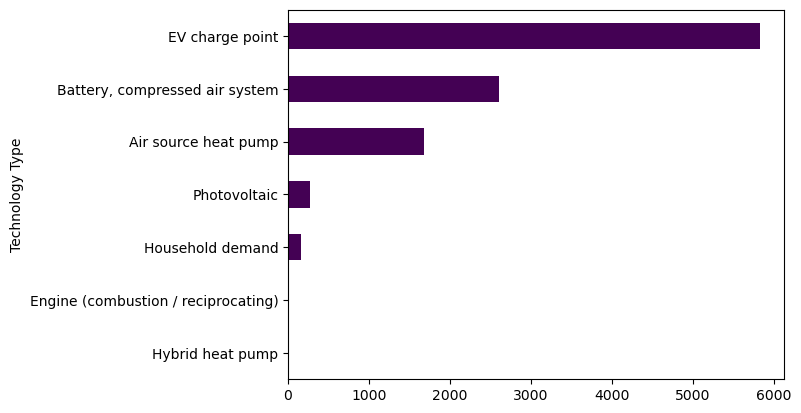

In [270]:
data['Technology Type'].value_counts().sort_values().plot(kind='barh', colormap='viridis');

<br></br>
### Total Asset Installed Capacity, Tendered Capacity, Offered Capacity, and Accepted Capacity for different companies

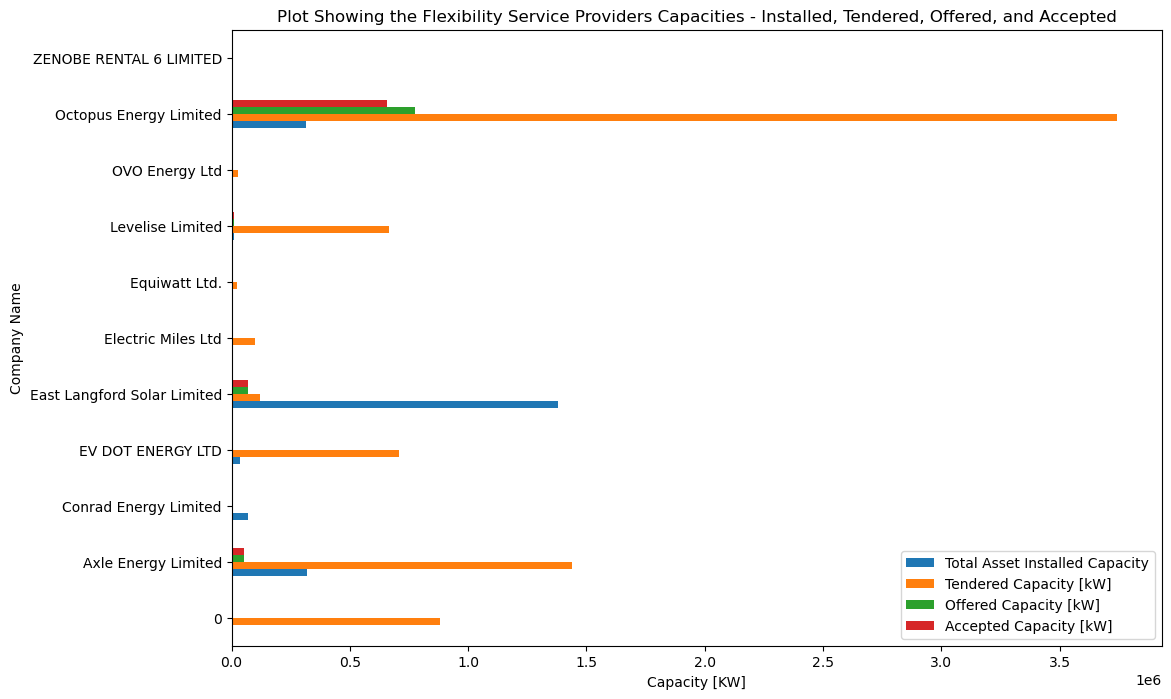

In [271]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
capacity_group = data.groupby('Company Name')[['Total Asset Installed Capacity', 'Tendered Capacity [kW]', 'Offered Capacity [kW]', 'Accepted Capacity [kW]']].agg('sum')
capacity_group.plot(kind='barh', ax=ax)
plt.xlabel('Capacity [KW]')
plt.title('Plot Showing the Flexibility Service Providers Capacities - Installed, Tendered, Offered, and Accepted')
plt.show()

In [272]:
capacity_group

,Total Asset Installed Capacity,Tendered Capacity [kW],Offered Capacity [kW],Accepted Capacity [kW]
Company Name,,,,
0,0.000000e+00,880082.0,0.000000,0.000000
Axle Energy Limited,3.165786e+05,1436830.5,52324.118402,52282.518402
Conrad Energy Limited,6.700000e+04,2060.0,2060.000000,1030.000000
EV DOT ENERGY LTD,3.471300e+04,708780.0,5188.000000,5135.000000
East Langford Solar Limited,1.380000e+06,119000.0,69650.000000,69650.000000
Electric Miles Ltd,2.452000e+03,97646.0,397.800000,356.200000
Equiwatt Ltd.,1.223640e+03,24660.0,890.000000,890.000000
Levelise Limited,1.139100e+04,664500.0,8598.000000,8598.000000
OVO Energy Ltd,1.384420e+02,26652.0,224.529400,224.529400


> Analysis: short analysis of the Total Asset Installed Capacity, Tendered Capacity, Offered Capacity, and Accepted Capacity for different companies

1. Market Leadership:
   - Octopus Energy Limited stands out as the market leader, with the highest values across all categories (except Total Asset Installed Capacity).
   - They offered 774,717 kW and had 656,101 kW accepted, significantly more than any other company.

2. Capacity Utilization:
   - East Langford Solar Limited has the highest Total Asset Installed Capacity (1,380,000 kW), but their offered and accepted capacities are much lower, suggesting potential underutilization or a aggressive pricing
   - Axle Energy Limited shows good utilization, offering and getting accepted for about 16.5% of their total installed capacity.

3. Offer vs. Acceptance:
   - Most companies have their entire offered capacity accepted, indicating efficient bidding strategies.
   - Octopus Energy Limited and Axle Energy Limited show slight differences between offered and accepted capacities, possibly due to market constraints or competitive pricing.

4. Tendered vs. Offered Capacity:
   - There's a significant gap between Tendered Capacity and Offered Capacity for most companies, suggesting that the market demand (tendered capacity) far exceeds what companies are willing or able to offer.

5. Smaller Players:
   - Companies like Equiwatt Ltd., Electric Miles Ltd, and OVO Energy Ltd have much smaller capacities, possibly indicating new market entrants.

6. Anomalies:
   - The first row (index 0) shows zero values for most columns, which might be an data error or represent aggregated data for smaller, unidentified participants.

7. Diverse Strategies:
   - Companies like Conrad Energy Limited and ZENOBE RENTAL 6 LIMITED offer capacities close to their total installed capacity, suggesting focused strategies or specialized assets.


<br></br>

In [273]:

def display_table(index, columns, values, agg_func='sum', margins_name='Total'):
    print(f'Table showing "{index}" by "{columns}" with {agg_func} of "{values}"\n')
    margins = False
    if margins_name:
        margins = True
    return data.pivot_table(columns=columns, index=index, values=values,
                 aggfunc=agg_func,
                 margins=margins,
                 margins_name=margins_name,
                 fill_value=0).round(2)
    
display_table(columns='Technology Type', index='Company Name', values='Number of Assets')

Table showing "Company Name" by "Technology Type" with sum of "Number of Assets"



Technology Type,Air source heat pump,"Battery, compressed air system",EV charge point,Engine (combustion / reciprocating),Household demand,Hybrid heat pump,Photovoltaic,Total
Company Name,,,,,,,,
Axle Energy Limited,0,992,42345,0,0,18,0,43355
Conrad Energy Limited,0,0,0,10,0,0,0,10
EV DOT ENERGY LTD,0,0,4959,0,0,0,0,4959
East Langford Solar Limited,0,0,0,0,0,0,276,276
Electric Miles Ltd,0,0,344,0,0,0,0,344
Equiwatt Ltd.,0,0,0,0,3708,0,0,3708
Levelise Limited,0,3797,0,0,0,0,0,3797
OVO Energy Ltd,0,0,46,0,290,0,0,336
Octopus Energy Limited,5569,23598,141240,0,0,0,0,170407


> Observations

This analysis provides valuable insights into the distribution of technology types across different companies in the NGED's flexibility market. Here's a summary of the key findings:

1. **Total Assets**: The dataset includes 227,198 assets across all companies and technology types.

2. **Dominant Technology**: EV charge points are by far the most common technology type, accounting for 188,940 assets (about 83% of the total).

3. Leading Companies:
   - Octopus Energy Limited has the most assets (170,407), primarily in EV charge points (141,240) and battery/compressed air systems (23,598).
   - Axle Energy Limited is second with 43,355 assets, mostly EV charge points (42,345).

4. Technology Diversity:
   - Most companies specialize in one or two technology types.
   - Octopus Energy Limited shows the most diversity, with significant numbers in three categories.

5. Unique Technologies:
   - Only Octopus Energy has air source heat pumps (5,569).
   - Conrad Energy Limited is the only company with engine assets (10).
   - East Langford Solar Limited is the sole company with photovoltaic assets (276).

6. Smaller Players:
   - ZENOBE RENTAL 6 LIMITED has the fewest assets (6), all EV charge points.
   - Electric Miles Ltd and OVO Energy Ltd also have relatively small asset counts.

7. Niche Technologies:
   - Household demand is primarily associated with Equiwatt Ltd. (3,708 assets).
   - Hybrid heat pumps are only found with Axle Energy Limited (18 assets).

This analysis reveals a market heavily focused on EV charging infrastructure, with a few large players dominating the asset count. It also shows specialization among smaller companies in specific technology types, suggesting a diverse and evolving energy technology landscape.


In [274]:
display_table(index='Company Name', columns='Technology Type', values='Offered Capacity [kW]')

Table showing "Company Name" by "Technology Type" with sum of "Offered Capacity [kW]"



Technology Type,Air source heat pump,"Battery, compressed air system",EV charge point,Engine (combustion / reciprocating),Household demand,Hybrid heat pump,Photovoltaic,Total
Company Name,,,,,,,,
Axle Energy Limited,0.00,50.00,52216.17,0.0,0.00,57.95,0.0,52324.12
Conrad Energy Limited,0.00,0.00,0.00,2060.0,0.00,0.00,0.0,2060.00
EV DOT ENERGY LTD,0.00,0.00,5188.00,0.0,0.00,0.00,0.0,5188.00
East Langford Solar Limited,0.00,0.00,0.00,0.0,0.00,0.00,69650.0,69650.00
Electric Miles Ltd,0.00,0.00,397.80,0.0,0.00,0.00,0.0,397.80
Equiwatt Ltd.,0.00,0.00,0.00,0.0,890.00,0.00,0.0,890.00
Levelise Limited,0.00,8598.00,0.00,0.0,0.00,0.00,0.0,8598.00
OVO Energy Ltd,0.00,0.00,94.44,0.0,130.09,0.00,0.0,224.53
Octopus Energy Limited,248682.97,259124.95,266909.49,0.0,0.00,0.00,0.0,774717.41


> Analysis

As a flexibility analyst, I can provide the following insights from this data:

1. Market Dominance: Octopus Energy Limited is by far the largest player in the flexibility market, offering 774,717.41 kW of capacity, which is about 84% of the total offered capacity across all companies.

2. Technology Diversity: The market shows a diverse range of flexibility technologies, with EV charge points being the most significant (329,005.90 kW), followed closely by battery/compressed air systems (267,772.95 kW) and air source heat pumps (248,682.97 kW).

3. Specialization: Most companies specialize in one or two technology types. For example:
   - East Langford Solar Limited offers only photovoltaic capacity (69,650 kW)
   - Conrad Energy Limited focuses solely on engine (combustion/reciprocating) technology (2,060 kW)
   - Levelise Limited specializes in battery/compressed air systems (8,598 kW)

4. EV Charge Point Prominence: EV charge points are the most widely adopted technology, with 5 out of 10 companies offering this type of flexibility.

5. Emerging Technologies: Some technologies have limited adoption:
   - Only Octopus Energy offers air source heat pumps, but at a significant capacity (248,682.97 kW)
   - Hybrid heat pumps are only offered by Axle Energy Limited, with a small capacity (57.95 kW)
   - Household demand flexibility is offered by just two companies: Equiwatt Ltd. and OVO Energy Ltd

6. Scale Variations: There's a wide range in the scale of operations, from OVO Energy Ltd offering just 224.53 kW to Octopus Energy Limited's 774,717.41 kW.

7. Potential for Growth: Some technologies, like photovoltaic and engine-based flexibility, are only offered by one company each, suggesting potential growth areas for other players.

8. Market Concentration: The top three companies (Octopus Energy, East Langford Solar, and Axle Energy) account for about 97% of the total offered capacity, indicating a highly concentrated market.

These insights suggest a rapidly evolving flexibility market with significant potential for growth and diversification, particularly in emerging technologies and for smaller players looking to expand their offerings.

In [275]:
display_table(index='Company Name', columns='Technology Type', values='Accepted Capacity [kW]')

Table showing "Company Name" by "Technology Type" with sum of "Accepted Capacity [kW]"



Technology Type,Air source heat pump,"Battery, compressed air system",EV charge point,Engine (combustion / reciprocating),Household demand,Hybrid heat pump,Photovoltaic,Total
Company Name,,,,,,,,
Axle Energy Limited,0.00,50.00,52174.57,0.0,0.00,57.95,0.0,52282.52
Conrad Energy Limited,0.00,0.00,0.00,1030.0,0.00,0.00,0.0,1030.00
EV DOT ENERGY LTD,0.00,0.00,5135.00,0.0,0.00,0.00,0.0,5135.00
East Langford Solar Limited,0.00,0.00,0.00,0.0,0.00,0.00,69650.0,69650.00
Electric Miles Ltd,0.00,0.00,356.20,0.0,0.00,0.00,0.0,356.20
Equiwatt Ltd.,0.00,0.00,0.00,0.0,890.00,0.00,0.0,890.00
Levelise Limited,0.00,8598.00,0.00,0.0,0.00,0.00,0.0,8598.00
OVO Energy Ltd,0.00,0.00,94.44,0.0,130.09,0.00,0.0,224.53
Octopus Energy Limited,209127.77,219669.75,227304.29,0.0,0.00,0.00,0.0,656101.81


In [276]:
table = display_table(index='Company Name', columns='Technology Type', values='Accepted Capacity [kW]', margins_name=None)
df = pd.DataFrame(table.to_records())
df = df.melt(id_vars='Company Name', var_name='Technology Type', value_name='Accepted Capacity [kW]')

fig = px.bar(df, 
             x='Company Name', 
             y='Accepted Capacity [kW]', 
             color='Technology Type', 
             title='Accepted Capacity [kW] by Company and Technology Type',
             labels={'Accepted Capacity [kW]': 'Accepted Capacity (kW)', 'Company Name': 'Company'},
             text='Accepted Capacity [kW]',
             barmode='group',  # Grouped bars
             height=750)
# Update layout for better readability
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_title='Company Name',
                  yaxis_title='Accepted Capacity [kW]',
                  legend_title='Technology Type',
                  margin=dict(l=150, r=50, t=50, b=50), 
                  bargap=0.1) 

# Show the plot
fig.show()

Table showing "Company Name" by "Technology Type" with sum of "Accepted Capacity [kW]"



In [277]:
# Group the data by Company Name and Technology Type, summing the Accepted Capacity
company_tect_cap = data.groupby(['Company Name', 'Technology Type'])['Accepted Capacity [kW]'].sum().reset_index()

# Get unique companies and technology types
companies = company_tect_cap['Company Name'].unique()
tech_types = company_tect_cap['Technology Type'].unique()

# Create a color map for technology types
color_map = {
    'EV charge point': 'blue',
    'Battery, compressed air system': 'green',
    'Air source heat pump': 'red',
    'Household demand': 'purple',
    'Engine (combustion / reciprocating)': 'orange',
    'Hybrid heat pump': 'cyan',
    'Photovoltaic': 'yellow'
}

# Create traces for each technology type
traces = []
for tech in tech_types:
    tech_data = company_tect_cap[company_tect_cap['Technology Type'] == tech]
    traces.append(go.Bar(
        name=tech,
        x=tech_data['Company Name'],
        y=tech_data['Accepted Capacity [kW]'],
        marker_color=color_map.get(tech, 'grey')
    ))

# Create the layout
layout = go.Layout(
    title='Accepted Capacity [kW] by Technology Type and Company',
    barmode='stack',
    xaxis={'title': 'Company Name'},
    yaxis={'title': 'Accepted Capacity [kW]'},
    legend_title='Technology Type',
    height=600,
    width=1000
)

# Create and show the figure
fig = go.Figure(data=traces, layout=layout)
fig.show()


In [278]:
company_tect_cap

,Company Name,Technology Type,Accepted Capacity [kW]
0,Axle Energy Limited,"Battery, compressed air system",50.000000
1,Axle Energy Limited,EV charge point,52174.568402
2,Axle Energy Limited,Hybrid heat pump,57.950000
3,Conrad Energy Limited,Engine (combustion / reciprocating),1030.000000
4,EV DOT ENERGY LTD,EV charge point,5135.000000
5,East Langford Solar Limited,Photovoltaic,69650.000000
6,Electric Miles Ltd,EV charge point,356.200000
7,Equiwatt Ltd.,Household demand,890.000000
8,Levelise Limited,"Battery, compressed air system",8598.000000
9,OVO Energy Ltd,EV charge point,94.437800


Based on the provided data, here's a short analysis of the accepted capacity by technology type for different companies:

1. Technology Diversity:
   - EV charge points are the most common technology, offered by 6 out of 10 companies.
   - Battery systems, air source heat pumps, and household demand also have significant presence.

2. Market Leaders:
   - Octopus Energy Limited is the clear market leader, with the highest accepted capacities across three technologies: EV charge points (227,304 kW), battery systems (219,670 kW), and air source heat pumps (209,128 kW).

3. Specialized Providers:
   - East Langford Solar Limited is the only company offering photovoltaic technology, with a substantial capacity of 69,650 kW.
   - Conrad Energy Limited specializes in combustion engines, with 1,030 kW accepted capacity.

4. EV Charge Point Market:
   - While Octopus Energy leads, Axle Energy Limited is a strong second in EV charge points with 52,175 kW accepted capacity.
   - Other significant players include EV DOT ENERGY LTD and ZENOBE RENTAL 6 LIMITED.

5. Emerging Technologies:
   - Hybrid heat pumps (Axle Energy Limited) and household demand (Equiwatt Ltd. and OVO Energy Ltd) show lower capacities, possibly indicating newer or niche technologies.

6. Battery Storage:
   - After Octopus Energy, Levelise Limited is the second-largest provider of battery storage capacity at 8,598 kW.



### Looking at Flexibility Product

In [279]:
data['Flexibility Product'].value_counts()

Flexibility Product
Dynamic    5800
Sustain    5293
Secure     4043
Name: count, dtype: int64

In [280]:
company_flex_product = data.groupby(['Company Name', 'Flexibility Product'])['Technology Type'].count().unstack(fill_value=0)
company_flex_product

Flexibility Product,Dynamic,Secure,Sustain
Company Name,,,
0,0,0,0
Axle Energy Limited,1195,870,381
Conrad Energy Limited,0,10,0
EV DOT ENERGY LTD,288,106,0
East Langford Solar Limited,276,0,0
Electric Miles Ltd,44,59,0
Equiwatt Ltd.,0,30,0
Levelise Limited,652,160,0
OVO Energy Ltd,0,0,172


In [281]:
# Expanded
display_table(columns='Flexibility Product', index='Company Name', margins_name='Total Flexibility', values='Technology Type', agg_func='count')

Table showing "Company Name" by "Flexibility Product" with count of "Technology Type"



Flexibility Product,Dynamic,Secure,Sustain,Total Flexibility
Company Name,,,,
0,0,0,0,NaN
Axle Energy Limited,1195,870,381,2446.0
Conrad Energy Limited,0,10,0,10.0
EV DOT ENERGY LTD,288,106,0,394.0
East Langford Solar Limited,276,0,0,276.0
Electric Miles Ltd,44,59,0,103.0
Equiwatt Ltd.,0,30,0,30.0
Levelise Limited,652,160,0,812.0
OVO Energy Ltd,0,0,172,172.0


<Axes: ylabel='Company Name'>

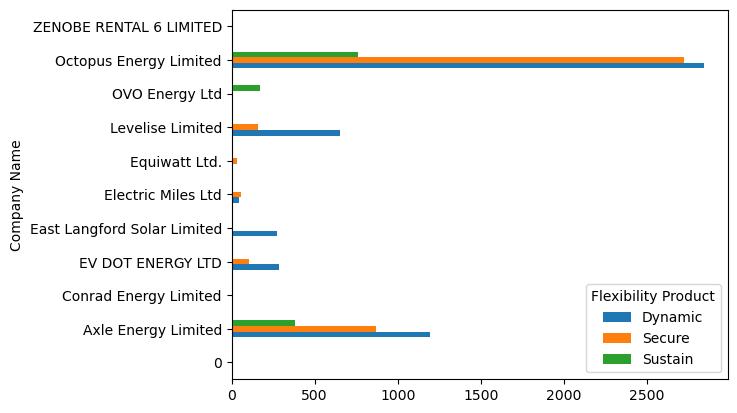

In [282]:
company_flex_product.plot(kind='barh')

> Analysis

1. Market Leaders:
   - Octopus Energy Limited is the clear market leader, offering all three types of Flexibility Products (Dynamic, Secure, and Sustain) with the highest numbers across the board.
   - Axle Energy Limited is the second most active player, also offering all three product types.

2. Product Popularity:
   - Dynamic products are the most commonly offered, followed closely by Secure products.
   - Sustain products are offered by fewer companies and in smaller quantities.

3. Company Specializations:
   - Some companies specialize in specific products:
     - East Langford Solar Limited only offers Dynamic products.
     - OVO Energy Ltd only offers Sustain products.
     - ZENOBE RENTAL 6 LIMITED and Conrad Energy Limited have very limited offerings, focusing on Dynamic and Secure products respectively.

4. Diverse Portfolios:
   - Octopus Energy Limited and Axle Energy Limited have the most diverse portfolios, offering significant numbers across all three product types.
   - Levelise Limited and EV DOT ENERGY LTD also offer a mix of Dynamic and Secure products.

5. Market Concentration:
   - The market appears to be heavily concentrated, with Octopus Energy Limited and Axle Energy Limited accounting for a large portion of the total offerings across all product types.

6. Product-Specific Observations:
   - Dynamic: Offered by 8 out of 10 companies, indicating its widespread adoption.
   - Secure: Offered by 7 out of 10 companies, closely following Dynamic in popularity.
   - Sustain: Only offered by 4 companies, suggesting it might be a more specialized or newer product.

7. Potential Market Gaps:
   - There might be opportunities for companies to expand into Sustain products, given its lower adoption rate.


In [283]:
from tabulate import tabulate

result = data.groupby(['Company Name', 'Technology Type', 'Flexibility Product'])['Restore Price'].count().reset_index(name='Count')
print(tabulate(result, headers='keys', tablefmt='psql'))

+----+-----------------------------+-------------------------------------+-----------------------+---------+
|    | Company Name                | Technology Type                     | Flexibility Product   |   Count |
|----+-----------------------------+-------------------------------------+-----------------------+---------|
|  0 | Axle Energy Limited         | Battery, compressed air system      | Secure                |       2 |
|  1 | Axle Energy Limited         | EV charge point                     | Dynamic               |    1195 |
|  2 | Axle Energy Limited         | EV charge point                     | Secure                |     868 |
|  3 | Axle Energy Limited         | EV charge point                     | Sustain               |     373 |
|  4 | Axle Energy Limited         | Hybrid heat pump                    | Sustain               |       8 |
|  5 | Conrad Energy Limited       | Engine (combustion / reciprocating) | Secure                |      10 |
|  6 | EV DOT ENERG

In [284]:
display_table(columns='Technology Type', index='Company Name', margins_name='Total Price', values='Restore Price')

Table showing "Company Name" by "Technology Type" with sum of "Restore Price"



Technology Type,Air source heat pump,"Battery, compressed air system",EV charge point,Engine (combustion / reciprocating),Household demand,Hybrid heat pump,Photovoltaic,Total Price
Company Name,,,,,,,,
Axle Energy Limited,0,2400,2923200,0,0,9600,0,2935200
Conrad Energy Limited,0,0,0,12000,0,0,0,12000
EV DOT ENERGY LTD,0,0,472800,0,0,0,0,472800
East Langford Solar Limited,0,0,0,0,0,0,331200,331200
Electric Miles Ltd,0,0,123600,0,0,0,0,123600
Equiwatt Ltd.,0,0,0,0,36000,0,0,36000
Levelise Limited,0,974400,0,0,0,0,0,974400
OVO Energy Ltd,0,0,48000,0,158400,0,0,206400
Octopus Energy Limited,2018400,2151600,3422400,0,0,0,0,7592400


In [285]:
display_table(columns='Flexibility Product', index='Company Name', margins_name='Total Price', values='Restore Price')

Table showing "Company Name" by "Flexibility Product" with sum of "Restore Price"



Flexibility Product,Dynamic,Secure,Sustain,Total Price
Company Name,,,,
0,594000,103200,4774800,5472000
Axle Energy Limited,1434000,1044000,457200,2935200
Conrad Energy Limited,0,12000,0,12000
EV DOT ENERGY LTD,345600,127200,0,472800
East Langford Solar Limited,331200,0,0,331200
Electric Miles Ltd,52800,70800,0,123600
Equiwatt Ltd.,0,36000,0,36000
Levelise Limited,782400,192000,0,974400
OVO Energy Ltd,0,0,206400,206400


In [286]:
display_table(columns='Flexibility Product', index='Company Name', margins_name='Total Price', values='Restore Price', agg_func='sum')

Table showing "Company Name" by "Flexibility Product" with sum of "Restore Price"



Flexibility Product,Dynamic,Secure,Sustain,Total Price
Company Name,,,,
0,594000,103200,4774800,5472000
Axle Energy Limited,1434000,1044000,457200,2935200
Conrad Energy Limited,0,12000,0,12000
EV DOT ENERGY LTD,345600,127200,0,472800
East Langford Solar Limited,331200,0,0,331200
Electric Miles Ltd,52800,70800,0,123600
Equiwatt Ltd.,0,36000,0,36000
Levelise Limited,782400,192000,0,974400
OVO Energy Ltd,0,0,206400,206400


In [287]:
display_table(columns='Technology Type', index='Company Name', margins_name='Total Count', values='Flexibility Product', agg_func='count')

Table showing "Company Name" by "Technology Type" with count of "Flexibility Product"



Technology Type,Air source heat pump,"Battery, compressed air system",EV charge point,Engine (combustion / reciprocating),Household demand,Hybrid heat pump,Photovoltaic,Total Count
Company Name,,,,,,,,
Axle Energy Limited,0,2,2436,0,0,8,0,2446
Conrad Energy Limited,0,0,0,10,0,0,0,10
EV DOT ENERGY LTD,0,0,394,0,0,0,0,394
East Langford Solar Limited,0,0,0,0,0,0,276,276
Electric Miles Ltd,0,0,103,0,0,0,0,103
Equiwatt Ltd.,0,0,0,0,30,0,0,30
Levelise Limited,0,812,0,0,0,0,0,812
OVO Energy Ltd,0,0,40,0,132,0,0,172
Octopus Energy Limited,1682,1793,2852,0,0,0,0,6327


### Timeseries of utilisations

In [28]:
# Group by 'Delivery Start Date' and 'Company Name', calculate median utilisation price
company_delivery_date = data.groupby(['Delivery Start Date', 'Company Name'])['Offered Utilisation Price'].median().reset_index()

# Group by 'Delivery Start Time' and 'Company Name', calculate median utilisation price
company_delivery_time = data.groupby(['Delivery Start Time', 'Company Name'])['Offered Utilisation Price'].median().reset_index()

# Get unique companies
companies = company_delivery_date['Company Name'].unique()

# Create subplots with two rows, one for date, one for time
fig = make_subplots(rows=2, cols=1, 
                    subplot_titles=('Offered Utilisation Price by Delivery Start Date', 
                                    'Offered Utilisation Price by Delivery Start Time'),
                    shared_yaxes=True)

# Add traces for each company for the Delivery Start Date subplot
for company in companies:
    company_data = company_delivery_date[company_delivery_date['Company Name'] == company]
    fig.add_trace(
        go.Scatter(x=company_data['Delivery Start Date'], 
                   y=company_data['Offered Utilisation Price'],
                   name=company + " (Date)", mode='lines+markers'),
        row=1, col=1
    )

# Add traces for each company for the Delivery Start Time subplot
for company in companies:
    company_data = company_delivery_time[company_delivery_time['Company Name'] == company]
    fig.add_trace(
        go.Scatter(x=company_data['Delivery Start Time'], 
                   y=company_data['Offered Utilisation Price'],
                   name=company + " (Time)", mode='lines+markers'),
        row=2, col=1
    )

# Update layout for the entire figure
fig.update_layout(
    title='Offered Utilisation Price Over Delivery Date and Time by Company',
    height=800, width=1800,
    hovermode='x unified',
    legend_title='Company Name'
)

# Add x-axis titles for both subplots
fig.update_xaxes(title_text='Delivery Start Date', row=1, col=1)
fig.update_xaxes(title_text='Delivery Start Time', row=2, col=1)

# Add y-axis title
fig.update_yaxes(title_text='Offered Utilisation Price', row=1, col=1)

# Show the plot
fig.show()

In [71]:

# Group by 'Delivery Start Date' and 'Company Name', calculate median utilisation price
company_delivery_date = data.groupby(['Delivery Start Date', 'Company Name', 'Delivery Period', 'Accepted Capacity [kW]'])['Offered Utilisation Price'].min().reset_index()

# Group by 'Delivery Start Time' and 'Company Name', calculate median utilisation price
company_delivery_time = data.groupby(['Delivery Start Time', 'Company Name', 'Accepted Capacity [kW]'])['Offered Utilisation Price'].min().reset_index()

# Get unique companies
companies = company_delivery_date['Company Name'].unique()

# Create subplots with two rows (one for date, one for time)
fig = make_subplots(rows=2, cols=1, 
                    subplot_titles=(
                        'Offered Utilisation Price by Delivery Start Date', 
                        'Offered Utilisation Price by Delivery Start Time'),
                    shared_yaxes=True)

# Add traces for each company for the Delivery Start Date subplot (row 1)
for company in companies:
    company_data = company_delivery_date[company_delivery_date['Company Name'] == company]
    fig.add_trace(
        go.Scatter(
            x=company_data['Delivery Start Date'], 
            y=company_data['Offered Utilisation Price'],
            name=company,  # Single name for the legend
            mode='lines+markers',
            # Hover template with Date, Accepted Capacity, Delivery Period, and Offered Utilisation Price
            hovertemplate='<b>Accepted Capacity:</b> %{customdata[0]:.2f} kW<br>' +
                          '<b>Delivery Period (days):</b> %{customdata[1]}<br>' +
                          '<b>Minimum Price:</b> £%{y:.2f}<extra></extra>',
            customdata=company_data[['Accepted Capacity [kW]', 'Delivery Period']].values  # Passing both Accepted Capacity and Delivery Period
        ),
        row=1, col=1
    )

# Add traces for each company for the Delivery Start Time subplot (row 2)
for company in companies:
    company_data = company_delivery_time[company_delivery_time['Company Name'] == company]
    fig.add_trace(
        go.Scatter(
            x=company_data['Delivery Start Time'], 
            y=company_data['Offered Utilisation Price'],
            name=company,  # Same name, but no duplicate in the legend
            mode='lines+markers',
            hovertemplate='<b>FSP:</b> %{customdata[0]}<br>' +
            			  '<b>Offered Utilisation Price:</b> £%{y:.2f}<br>' +
						  '<b>Accepted Capacity:</b> %{customdata[1]:.2f} kW<br>' +
                          '<b>Minimum Price:</b> £%{y:.2f}<extra></extra>',
            
            customdata=company_data[['Company Name', 'Accepted Capacity [kW]']].values,  # Passing both Accepted Capacity and Delivery Period
            showlegend=False  # Avoid duplicate legends
        ),
        row=2, col=1
    )

# Update layout for the entire figure
fig.update_layout(
    title='Offered Utilisation Price Over Delivery Date and Time by Company',
    height=1000, width=1800,  # Adjust height to fit the two subplots
    hovermode='x unified',
    legend_title='Company Name'
)

# Add x-axis titles for both subplots
fig.update_xaxes(title_text='Delivery Start Date', row=1, col=1)
fig.update_xaxes(title_text='Delivery Start Time', row=2, col=1)

# Add y-axis title (shared across subplots)
fig.update_yaxes(title_text='Offered Utilisation Price', row=1, col=1)

# Show the plot
fig.show()


In [99]:
flex = data.groupby('Flexibility Product').agg(
    Awarded_Availability_Price=('Awarded Availability Price', 'sum'),
    # Total_Tendered_Capacity=('Tendered Capacity [kW]', 'sum'),  # Sum of capacities
    Company_Names=('Company Name', lambda x: ', '.join(x.unique())),  # Concatenate company names
    Total_Accepted_Capacity=('Accepted Capacity [kW]', 'sum')  # Total capacity per product
).reset_index()

# Create a doughnut chart
flex_fig = px.pie(
    flex,
    names='Flexibility Product',
    values='Total_Accepted_Capacity',
    hole=0.4,  # This creates the doughnut effect
    hover_data={
        'Flexibility Product': True,
        'Total_Accepted_Capacity': True,
        'Awarded_Availability_Price': True,
        # 'Total_Tendered_Capacity': True,
        # 'Total_Installed_Capacity': True,
        'Company_Names': True,
        
    },
    title='Distribution of Flexibility Products by Total Accepted Capacity'
)

# Update hover template to include the company names and total capacity
flex_fig.update_traces(
    hovertemplate="<b>Flexibility Product:</b> %{label}<br>" +
                  "<b>Total Accepted Capacity:</b> %{value} kW<br>" +
                  "<b>Awarded Availability Price:</b> £%{value:.2f}<br>" +
                #   "<b>Total Asset Installed Capacity:</b> %{value} kW<br>" +
                  "<b>Companies:</b> %{customdata[0]}<extra></extra>",
    customdata=flex[['Company_Names']].values  # Pass company names to customdata
)

# Show the plot
flex_fig.show()

In [90]:
data['Flexibility Product'].value_counts()

Flexibility Product
Dynamic    5800
Sustain    5293
Secure     4043
Name: count, dtype: int64

In [289]:
data.dtypes

CMZ Code                                       object
Flexibility Product                            object
Trade Opportunity Name                         object
Trade Window Name                              object
Delivery Start Date                    datetime64[ns]
Delivery End Date                      datetime64[ns]
Service Days                                   object
Delivery Start Time                            object
Delivery End Time                              object
Tendered Capacity [kW]                        float64
Tendered Ceiling Availability Price           float64
Tendered Ceiling Utilisation Price            float64
Tendered Sustain Ceiling Price                float64
Trade Open Date                                object
Trade Close Date                               object
Company Name                                   object
Offered Capacity [kW]                         float64
Offered Availability Price                    float64
Offered Utilisation Price   

### Time of Day for Capaicity Utilisation pricing

In [290]:
data['Delivery Start Time'] = pd.to_datetime(data['Delivery Start Time'], format='%H:%M:%S')

fig = px.bar(data, 
              x='Delivery Start Time', 
              y='Offered Utilisation Price', 
              color='Company Name', 
              barmode='stack',  # Group bars by company
              title='Offered Utilisation Price Over Time by Company',
              labels={'Delivery Start Time': 'Delivery Start Time',
                      'Offered Utilisation Price': 'Offered Utilisation Price'},
            height=700, width=1500)

# Update layout for better appearance
fig.update_layout(
    xaxis_title='Delivery Start Time',
    yaxis_title='Offered Utilisation Price',
    xaxis=dict(tickformat='%H:%M'),  # Format x-axis for time
    legend_title='Company Name'
)

# Show the plot
fig.show()

> Analysis

The data indicates that enhanced utilisation prices are most pronounced during specific time windows: between 5 PM and 6 PM, and 8:30 AM and 1 PM. 

This pattern aligns with common electricity demand trends, where prices fluctuate based on consumer usage patterns throughout the day.

**Service days**

The service days are Days of the week when the service is required

Note: The count is only number of days and not label encoded as weekdays.


In [291]:
# Group by 'Company Name' and count 'Service Days Count'
service_days_count = data.groupby('Company Name')[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].sum().reset_index()

fig = go.Figure()

# Add traces for each day of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in days_of_week:
    fig.add_trace(go.Bar(
        x=service_days_count['Company Name'],  # Company names on the x-axis
        y=service_days_count[day],          # Count of services available on that day
        name=day                       # Name of the day for the legend
    ))

# Update layout
fig.update_layout(
    title='Service Availability by Weekday',
    xaxis_title='Company Name',
    yaxis_title='Count of Services Available',
    barmode='group',                # Group bars together
    height=600,
    width=1500,
    legend_title='Weekdays'
)

# Show the plot
fig.show()

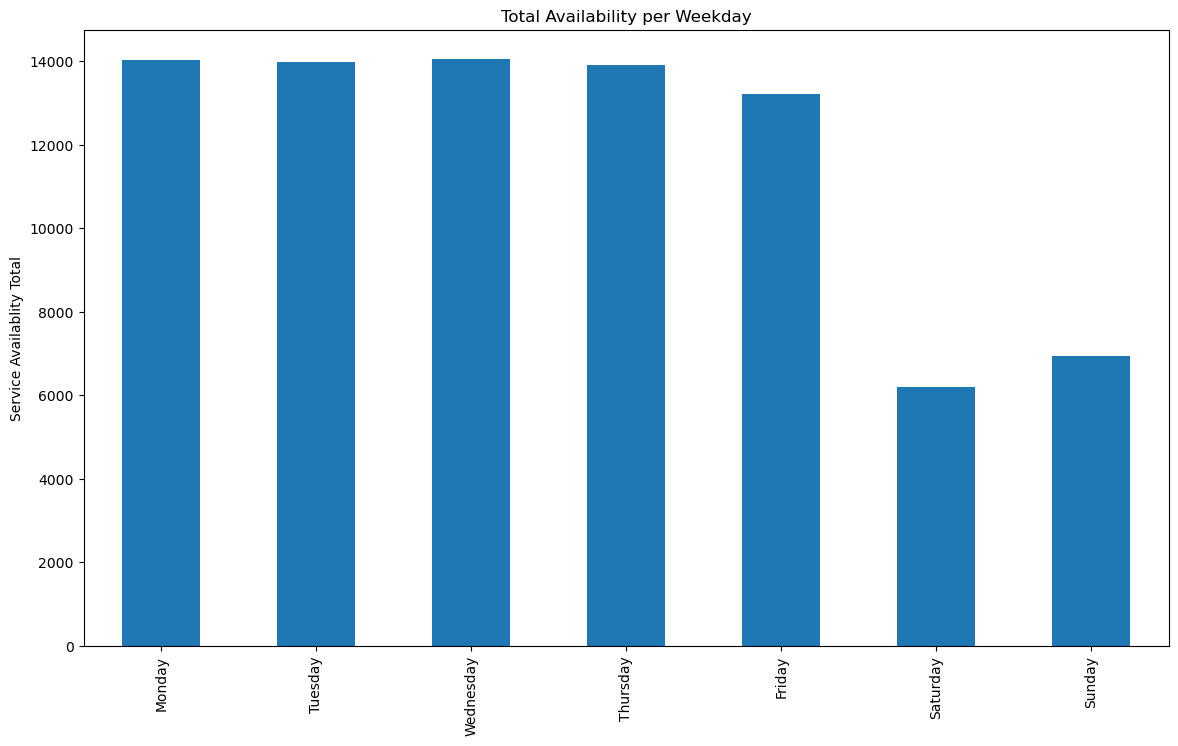

In [292]:
service_days_count[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].sum().plot(kind='bar', figsize=(14,8))
plt.ylabel('Service Availablity Total')
plt.title('Total Availability per Weekday');

> Analysis of Service Days by FSPs

#### Overall Observations

1. **Total Service Days**:
   - The first row indicates a total of service days across all companies for each weekday. This serves as a benchmark for understanding the overall service availability in the market.

2. **High Volume Companies**:
   - **Octopus Energy Limited** stands out significantly, with the highest service days across all weekdays. This indicates a robust operational capacity and a strong market presence, making them a key player in the industry.
   - **Axle Energy Limited** also shows substantial service days, particularly on weekdays, suggesting they have a well-established service offering.

3. **Low Activity Companies**:
   - **Conrad Energy Limited** shows minimal service days, particularly on weekends, indicating a limited operational capacity or a niche focus.
   - **Equiwatt Ltd.** and **OVO Energy Ltd** have very low service days, suggesting they may be smaller players or have specific service offerings that do not require extensive availability.

4. **Consistency Across Days**:
   - **East Langford Solar Limited** has consistent service days across all weekdays, indicating a stable service offering. This consistency can be beneficial for customer trust and reliability.
   - **Electric Miles Ltd** shows a decline in service days towards the end of the week, which could indicate a strategy to focus on higher demand days.

5. **Weekend Service Availability**:
   - Most companies have significantly lower service days on Saturday and Sunday compared to weekdays. This suggests that the market demand for services may be lower on weekends, or companies may not prioritize weekend operations.

#### Company-Specific Insights

- **Octopus Energy Limited**:
  - Dominates the service days count, suggesting they have a comprehensive service model that caters to a wide customer base. Their performance indicates a strong capability to meet demand throughout the week.

- **Axle Energy Limited**:
  - Consistent service availability, particularly during weekdays, indicates a competitive strategy. They may benefit from focusing on maintaining or expanding their service offerings.

- **Conrad Energy Limited**:
  - With low service days, they might need to reassess their operational strategy or explore opportunities to increase service availability to remain competitive.

- **EV DOT ENERGY LTD**:
  - Shows variability in service days, which may suggest a flexible service model that adapts to customer needs. However, they should analyze the reasons behind the lower counts on certain days.

- **East Langford Solar Limited**:
  - Their consistent service days indicate a reliable offering, which can be a strong selling point for customer retention.

- **Electric Miles Ltd**:
  - The decline in service days towards the weekend may suggest a need to evaluate customer demand or operational efficiency.

<br></br>

> Overview of Total Service Days

| Day       | Total Service Days |
|-----------|--------------------|
| Monday    | 14,036             |
| Tuesday   | 13,975             |
| Wednesday | 14,052             |
| Thursday  | 13,924             |
| Friday    | 13,226             |
| Saturday  | 6,200              |
| Sunday    | 6,953              |

#### Key Observations

1. **Weekday Dominance**:
   - **Monday** has the highest total service days (14,036), closely followed by **Wednesday** (14,052). This suggests that these days are likely the most popular for service availability, possibly due to higher demand or operational capacity.
   - **Tuesday** and **Thursday** also show strong service day counts, indicating consistent service offerings throughout the week.

2. **Decline Towards the Weekend**:
   - There is a noticeable drop in service days on **Friday** (13,226) compared to the earlier weekdays. This may suggest a shift in operational focus as the week progresses or a decrease in demand as the weekend approaches.
   - **Saturday** and **Sunday** have significantly lower service days (6,200 and 6,953, respectively). This indicates that service availability is reduced on weekends, which could be due to lower demand or operational constraints.



In [293]:
# Group by delivery period and calculate total capacity and average price
grouped_data = data.groupby('Delivery Period').agg({
    'Offered Capacity [kW]': 'sum',
    'Offered Utilisation Price': 'mean'
}).reset_index()

# Create subplots
fig = make_subplots(rows=2, cols=1, subplot_titles=('Total Offered Capacity by Delivery Period', 
                                                    'Average Offered Utilisation Price by Delivery Period'))

# Add trace for Offered Capacity
fig.add_trace(
    go.Bar(x=grouped_data['Delivery Period'].astype(str), 
           y=grouped_data['Offered Capacity [kW]'], 
           name='Offered Capacity [kW]', 
           marker_color='blue'),
    row=1, col=1
)

# Add trace for Offered Utilisation Price
fig.add_trace(
    go.Scatter(x=grouped_data['Delivery Period'].astype(str), 
               y=grouped_data['Offered Utilisation Price'], 
               name='Offered Utilisation Price', 
               mode='lines+markers', 
               marker_color='orange'),
    row=2, col=1
)

# Update layout
fig.update_layout(title='Delivery Period Analysis',
                  xaxis_title='Delivery Period',
                  yaxis_title='Offered Capacity [kW]',
                  height=600,
                  showlegend=True)

# Update x-axis for the second subplot
fig.update_xaxes(title_text='Delivery Period', row=2, col=1)

fig.show()

<Axes: ylabel='Frequency'>

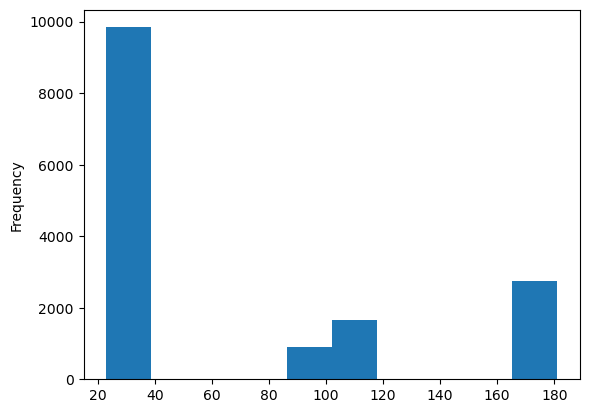

In [294]:
data['Delivery Period'].plot(kind='hist')



In [295]:
data['Flexibility Product']

0        Sustain
1        Sustain
2        Sustain
3        Sustain
4        Sustain
          ...   
15131     Secure
15132     Secure
15133     Secure
15134     Secure
15135     Secure
Name: Flexibility Product, Length: 15136, dtype: object

In [296]:
total_delivery_by_company = data.groupby('Company Name')['Delivery Period'].sum()
total_delivery_by_company 


Company Name
0                              645415
Axle Energy Limited             98444
Conrad Energy Limited             300
EV DOT ENERGY LTD               11385
East Langford Solar Limited      8113
Electric Miles Ltd               2996
Equiwatt Ltd.                     876
Levelise Limited                22940
OVO Energy Ltd                  19952
Octopus Energy Limited         244333
ZENOBE RENTAL 6 LIMITED           150
Name: Delivery Period, dtype: int64

In [297]:

# 1. Delivery Period by Company
total_delivery_by_company = data.groupby('Company Name')['Delivery Period'].sum().reset_index()
fig1 = px.bar(total_delivery_by_company, x='Company Name', y='Delivery Period',
               title='Total Delivery Period by Company',
               width=1400, height=600)
fig1.show()

# 2. Delivery Period by Technology Type
total_delivery_by_technology = data.groupby('Technology Type')['Delivery Period'].sum().reset_index()
fig2 = px.bar(total_delivery_by_technology, x='Technology Type', y='Delivery Period',
               title='Total Delivery Period by Technology Type',
               width=1400, height=600)
fig2.show()

# 3. Delivery Period by Flexibility Product
total_delivery_by_flexibility = data.groupby('Flexibility Product')['Delivery Period'].sum().reset_index()
fig3 = px.bar(total_delivery_by_flexibility, x='Flexibility Product', y='Delivery Period',
               title='Average Delivery Period by Flexibility Product',
               width=1400, height=600)
fig3.show()

**Feel free to contribute yours**